In [166]:
# Author: Alden
# Date: 11/13/2024
# Strategy: SMA Crossover
# Strategy Descrption:
    # Given a stock
    # It will perform buys when prices corss

In [167]:
import yfinance as yf
import pandas as pd
import numpy as np

In [168]:
# CHOOSE YOUR CHARACTER or stock ticker if you want it to work lol
stock = 'AAPL'
# SMA LENGTHS
sma_s = 50
sma_l = 100

In [169]:
data = yf.download(stock, start = "1990-01-01")
data = data['Close']
data

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
1990-01-02 00:00:00+00:00,0.332589
1990-01-03 00:00:00+00:00,0.334821
1990-01-04 00:00:00+00:00,0.335938
1990-01-05 00:00:00+00:00,0.337054
1990-01-08 00:00:00+00:00,0.339286
...,...
2024-11-07 00:00:00+00:00,227.479996
2024-11-08 00:00:00+00:00,226.960007
2024-11-11 00:00:00+00:00,224.229996


In [170]:
# Method Description: creates sma of specified size and adds to specified df
# Parameters: Dataframe, Size of Sma, Stock Ticker respectively
# returns new dataframe without NaN Values   
def create_sma(data, sma_size, stock):
    if not isinstance(data, pd.DataFrame):
        raise TypeError("The 'data' parameter must be a Pandas DataFrame.")
    
    label = "SMA" + str(sma_size)
    data[label] = data[stock].rolling(window=sma_size,min_periods=sma_size).mean()
    return data.dropna()
    

In [171]:
data = create_sma(data,sma_s, stock)
data = create_sma(data,sma_l, stock)


C:\Users\alden\AppData\Local\Temp\ipykernel_19540\324324462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[label] = data[stock].rolling(window=sma_size,min_periods=sma_size).mean()


In [172]:
data

Ticker,AAPL,SMA50,SMA100
Date,,,
1990-08-02 00:00:00+00:00,0.388393,0.375781,0.369922
1990-08-03 00:00:00+00:00,0.368304,0.375647,0.370313
1990-08-06 00:00:00+00:00,0.352679,0.375201,0.370536
1990-08-07 00:00:00+00:00,0.352679,0.375112,0.370781
1990-08-08 00:00:00+00:00,0.358259,0.374955,0.370770
...,...,...,...
2024-11-07 00:00:00+00:00,227.479996,226.876200,223.888700
2024-11-08 00:00:00+00:00,226.960007,226.819601,224.015400
2024-11-11 00:00:00+00:00,224.229996,226.724200,224.160900


<Axes: title={'center': 'AAPL SMA 50|100 Strat'}, xlabel='Date'>

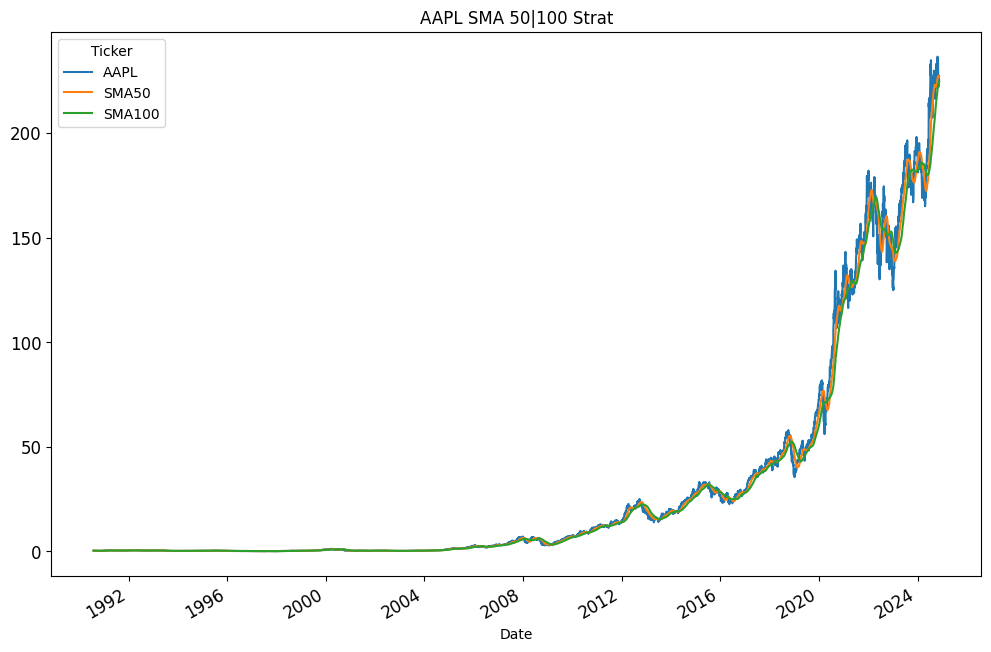

In [173]:
# Plotting Your Character
data.plot(figsize=(12,8), title= stock+' SMA {}|{} Strat'.format(sma_s,sma_l), fontsize=12)

<Axes: title={'center': 'AAPL SMA 50|100 Strat'}, xlabel='Date'>

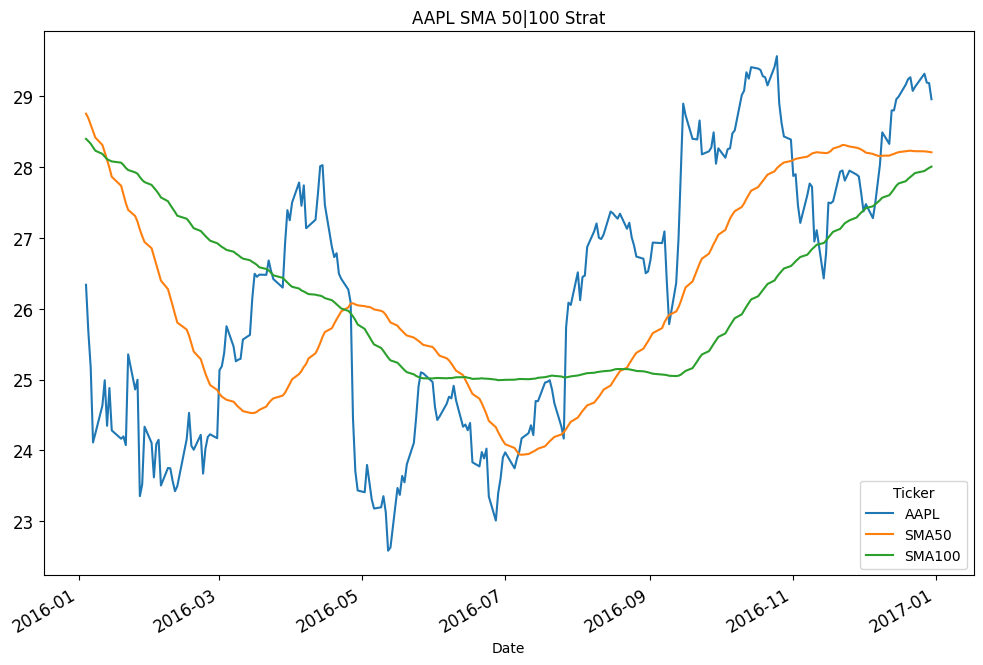

In [174]:
data.loc['2016'].plot(figsize=(12,8), title= stock+' SMA {}|{} Strat'.format(sma_s,sma_l), fontsize=12)

In [175]:
# Indicates Bullish or bearish Sentiment by populating
# Position column with 
    #  1 with Bullish
    #   -1 with Bearish
sma_SLabel = "SMA" + str(sma_s)
sma_LLabel = "SMA" + str(sma_l)
print(sma_SLabel, sma_LLabel)
                 
data['position'] = np.where(data[sma_SLabel]>data[sma_LLabel],1,-1)

SMA50 SMA100


In [176]:
data

Ticker,AAPL,SMA50,SMA100,position
Date,,,,
1990-08-02 00:00:00+00:00,0.388393,0.375781,0.369922,1
1990-08-03 00:00:00+00:00,0.368304,0.375647,0.370313,1
1990-08-06 00:00:00+00:00,0.352679,0.375201,0.370536,1
1990-08-07 00:00:00+00:00,0.352679,0.375112,0.370781,1
1990-08-08 00:00:00+00:00,0.358259,0.374955,0.370770,1
...,...,...,...,...
2024-11-07 00:00:00+00:00,227.479996,226.876200,223.888700,1
2024-11-08 00:00:00+00:00,226.960007,226.819601,224.015400,1
2024-11-11 00:00:00+00:00,224.229996,226.724200,224.160900,1


<Axes: title={'center': 'AAPL SMA 50|100 Strat'}, xlabel='Date'>

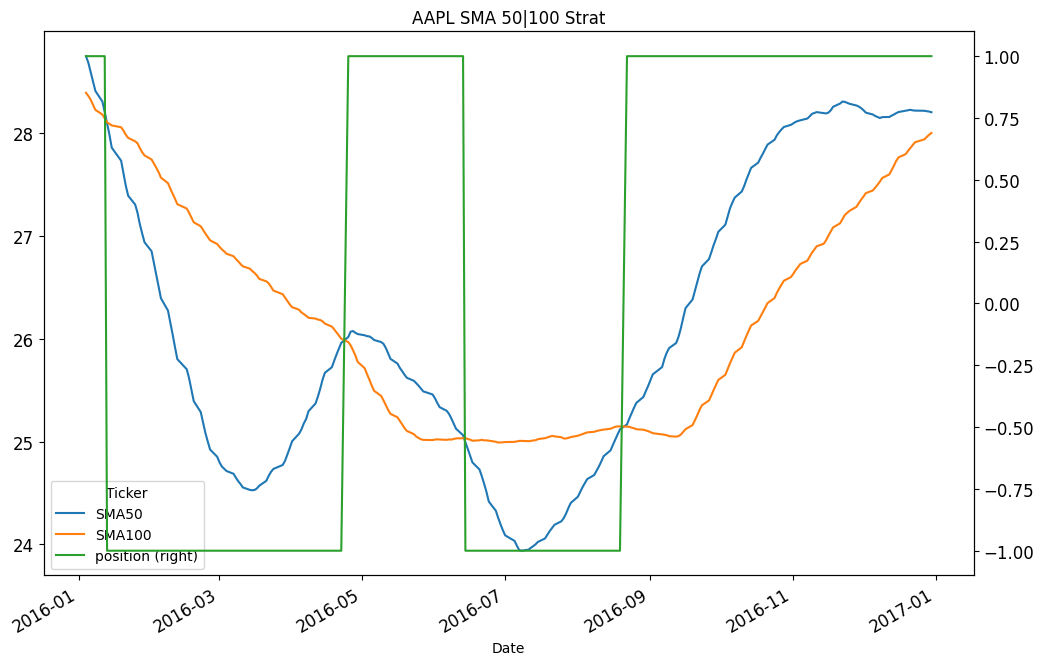

In [177]:
data.loc['2016',[sma_SLabel,sma_LLabel,'position']].plot(figsize=(12,8), title= stock+' SMA {}|{} Strat'.format(sma_s,sma_l), fontsize=12,secondary_y="position")

<Axes: title={'center': 'AAPL SMA 50|100 Strat'}, xlabel='Date'>

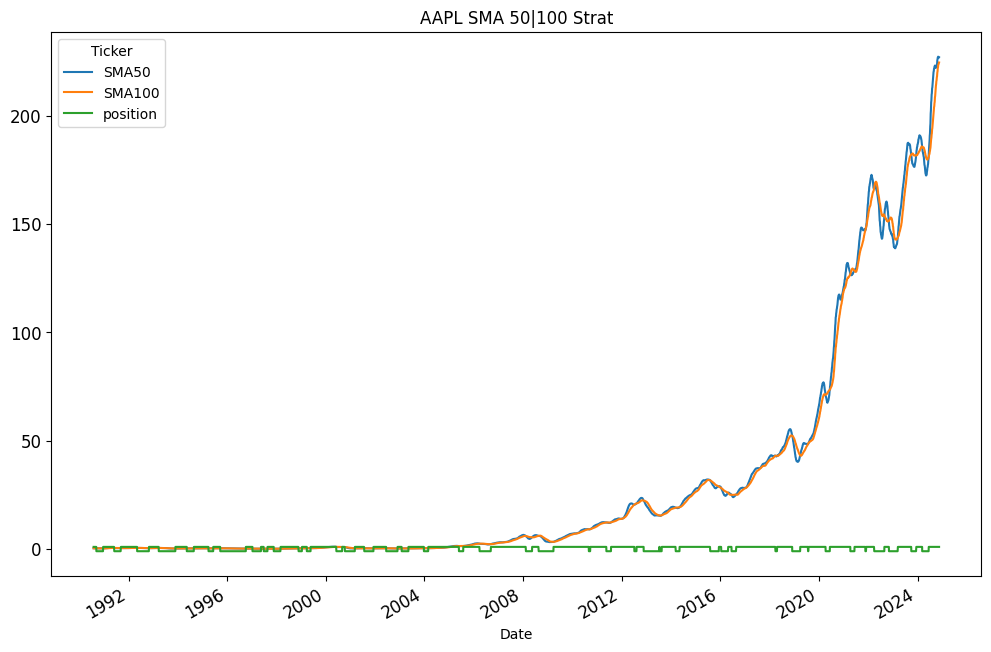

In [178]:
data.loc[:,[sma_SLabel,sma_LLabel,'position']].plot(figsize=(12,8), title= stock+' SMA {}|{} Strat'.format(sma_s,sma_l), fontsize=12)

# Back Testing

In [179]:
data["b&h_ret"] = np.log(data[stock].div(data[stock].shift()))
data

Ticker,AAPL,SMA50,SMA100,position,b&h_ret
Date,,,,,
1990-08-02 00:00:00+00:00,0.388393,0.375781,0.369922,1,NaN
1990-08-03 00:00:00+00:00,0.368304,0.375647,0.370313,1,-0.053109
1990-08-06 00:00:00+00:00,0.352679,0.375201,0.370536,1,-0.043350
1990-08-07 00:00:00+00:00,0.352679,0.375112,0.370781,1,0.000000
1990-08-08 00:00:00+00:00,0.358259,0.374955,0.370770,1,0.015698
...,...,...,...,...,...
2024-11-07 00:00:00+00:00,227.479996,226.876200,223.888700,1,0.021147
2024-11-08 00:00:00+00:00,226.960007,226.819601,224.015400,1,-0.002288
2024-11-11 00:00:00+00:00,224.229996,226.724200,224.160900,1,-0.012102


In [180]:
data['smaStrat']=data["b&h_ret"]*data.position.shift()
data

Ticker,AAPL,SMA50,SMA100,position,b&h_ret,smaStrat
Date,,,,,,
1990-08-02 00:00:00+00:00,0.388393,0.375781,0.369922,1,NaN,NaN
1990-08-03 00:00:00+00:00,0.368304,0.375647,0.370313,1,-0.053109,-0.053109
1990-08-06 00:00:00+00:00,0.352679,0.375201,0.370536,1,-0.043350,-0.043350
1990-08-07 00:00:00+00:00,0.352679,0.375112,0.370781,1,0.000000,0.000000
1990-08-08 00:00:00+00:00,0.358259,0.374955,0.370770,1,0.015698,0.015698
...,...,...,...,...,...,...
2024-11-07 00:00:00+00:00,227.479996,226.876200,223.888700,1,0.021147,0.021147
2024-11-08 00:00:00+00:00,226.960007,226.819601,224.015400,1,-0.002288,-0.002288
2024-11-11 00:00:00+00:00,224.229996,226.724200,224.160900,1,-0.012102,-0.012102


In [181]:
data.dropna(inplace=True)

# Compare Results

In [182]:
# To evaluate Absolute Performance
data[['b&h_ret','smaStrat']].sum().apply(np.exp)

Ticker
b&h_ret     579.619063
smaStrat      3.301345
dtype: float64

In [183]:
# Assess Risk
data[['b&h_ret','smaStrat']].std()*np.sqrt(252)

Ticker
b&h_ret     0.433813
smaStrat    0.433966
dtype: float64

Seems like basic B&H beats our SMA Strat

<Axes: xlabel='Date'>

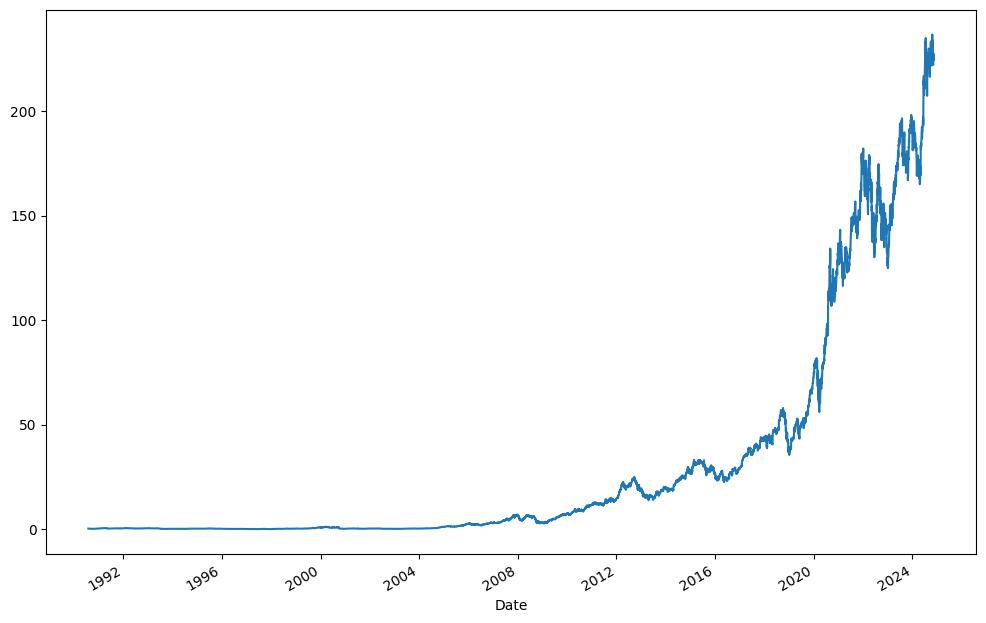

In [184]:
data[stock].plot(figsize=(12,8))

Upon Realizing that AAPL is in a bullish cycle lets adjust the SMA Strategy with Long Bias

In [185]:
data['position2'] = np.where(data[sma_SLabel]>data[sma_LLabel],1,0)

In [186]:
data['smaStrat2']=data["b&h_ret"]*data.position2.shift()

In [187]:
data.dropna(inplace=True)

In [190]:
data[['b&h_ret','smaStrat2']].sum()

Ticker
b&h_ret      6.415480
smaStrat2    3.831459
dtype: float64

In [191]:
data[['b&h_ret','smaStrat2']].sum().apply(np.exp)

Ticker
b&h_ret      611.234161
smaStrat2     46.129815
dtype: float64

In [193]:
data[['b&h_ret','smaStrat2']].std()*np.sqrt(252)

Ticker
b&h_ret      0.433741
smaStrat2    0.335710
dtype: float64

Strat 2 Reduces Risk while increasing returns making it better than Strat 1